In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('variables.csv')
df

,Epic_week,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
0,2006_01,1306,1437,20.071978,25.928571,30.197143,23.482857,7.731429,29.228571
1,2006_02,1209,1370,33.892308,25.142857,27.951429,23.020000,10.257143,32.971429
2,2006_03,1115,1636,6.319780,26.700000,31.654286,23.760000,7.605714,27.971429
3,2006_04,1083,1785,1.977473,26.930952,31.360000,24.002857,13.591429,32.157143
4,2006_05,1340,2244,0.655495,27.189286,31.737143,24.214286,14.111429,34.242857
...,...,...,...,...,...,...,...,...,...
673,2018_48,1711,2694,8.778947,27.619328,31.300877,24.605430,6.638137,33.339474
674,2018_49,1389,2224,9.319298,27.169853,31.748693,24.728945,6.130859,27.621055
675,2018_50,1621,2712,10.119799,27.022111,31.144712,24.709489,6.675198,30.162873
676,2018_51,1749,2801,4.597494,27.792700,32.482527,25.137852,7.526247,30.939678


In [ ]:
df['Epic_week'] = pd.to_datetime(df['Epic_week'] + '_1', format='%Y_%U_%w')

# set the 'Epic_week_adm' column as the index
df = df.set_index('Epic_week')

# convert the index to week-based format
df.index = df.index.strftime('%Y_%U')

In [ ]:
df

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
Epic_week,,,,,,,,
2006_01,1306,1437,20.071978,25.928571,30.197143,23.482857,7.731429,29.228571
2006_02,1209,1370,33.892308,25.142857,27.951429,23.020000,10.257143,32.971429
2006_03,1115,1636,6.319780,26.700000,31.654286,23.760000,7.605714,27.971429
2006_04,1083,1785,1.977473,26.930952,31.360000,24.002857,13.591429,32.157143
2006_05,1340,2244,0.655495,27.189286,31.737143,24.214286,14.111429,34.242857
...,...,...,...,...,...,...,...,...
2018_48,1711,2694,8.778947,27.619328,31.300877,24.605430,6.638137,33.339474
2018_49,1389,2224,9.319298,27.169853,31.748693,24.728945,6.130859,27.621055
2018_50,1621,2712,10.119799,27.022111,31.144712,24.709489,6.675198,30.162873


In [ ]:
# Time-lagged cross-correlation (Pearson correlation coefficient)
def cross_correlation(x, y, lag=0):
    return np.corrcoef(x[:-lag if lag else None], y[lag:])[0, 1]

# the feature and its best lag are appended to the selected_features list.
max_lag = 15
lags = range(1, max_lag + 1)
selected_features = []
feature_columns = df.columns
threshold = 0.2
for feature in feature_columns:
    max_corr = 0
    best_lag = 0
    for lag in lags:
        corr = cross_correlation(df[feature], df['Infectious and Parasitic Diseases'], lag)
        if abs(corr) > abs(max_corr):
            max_corr = corr
            best_lag = lag
    if abs(max_corr) > threshold:
        selected_features.append((feature, best_lag))

In [ ]:
selected_features

[('Infectious and Parasitic Diseases', 1),
 ('Respiratory Infection', 1),
 ('Mean_Mean_Temperature_C', 13),
 ('Mean_Minimum_Temperature_C', 11),
 ('Mean_Mean_Wind_Speed_kmh', 6)]

choose lag=1 for single-step. All the features will be used

In [ ]:
df

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
Epic_week,,,,,,,,
2006_01,1306,1437,20.071978,25.928571,30.197143,23.482857,7.731429,29.228571
2006_02,1209,1370,33.892308,25.142857,27.951429,23.020000,10.257143,32.971429
2006_03,1115,1636,6.319780,26.700000,31.654286,23.760000,7.605714,27.971429
2006_04,1083,1785,1.977473,26.930952,31.360000,24.002857,13.591429,32.157143
2006_05,1340,2244,0.655495,27.189286,31.737143,24.214286,14.111429,34.242857
...,...,...,...,...,...,...,...,...
2018_48,1711,2694,8.778947,27.619328,31.300877,24.605430,6.638137,33.339474
2018_49,1389,2224,9.319298,27.169853,31.748693,24.728945,6.130859,27.621055
2018_50,1621,2712,10.119799,27.022111,31.144712,24.709489,6.675198,30.162873


In [ ]:
df.shape

(678, 8)

In [ ]:
train_size = int(len(df) * 0.6)
val_size = int(len(df) * 0.2)
test_size = len(df) - train_size - val_size
train_set, val_set, test_set = np.split(df, [train_size, train_size+val_size])

# Keep the original index
train_index = train_set.index
val_index = val_set.index
test_index = test_set.index

In [ ]:
# Z-score normalization
scaler = StandardScaler()
scaler.fit(train_set)

train_set = scaler.transform(train_set)
val_set = scaler.transform(val_set)
test_set = scaler.transform(test_set)

In [ ]:
# From np.array back to dataframe
train_set = pd.DataFrame(train_set, columns=df.columns, index=train_index)
val_set = pd.DataFrame(val_set, columns=df.columns, index=val_index)
test_set = pd.DataFrame(test_set, columns=df.columns, index=test_index)

In [ ]:
# create the train, validation, and test datasets
train_tensor = torch.tensor(train_set.values, dtype=torch.float32)
val_tensor = torch.tensor(val_set.values, dtype=torch.float32)
test_tensor = torch.tensor(test_set.values, dtype=torch.float32)

# create new training, validation, and test datasets
train_data = []
for i in range(len(train_tensor)-1):
    train_data.append((train_tensor[i:i+1], train_tensor[i+1, 0]))
inputs, labels = zip(*train_data)
train_dataset = TensorDataset(torch.stack(inputs), torch.tensor(labels))

val_data = []
for i in range(len(val_tensor)-1):
    val_data.append((val_tensor[i:i+1], val_tensor[i+1, 0]))
inputs, labels = zip(*val_data)
val_dataset = TensorDataset(torch.stack(inputs), torch.tensor(labels))

test_data = []
for i in range(len(test_tensor)-1):
    test_data.append((test_tensor[i:i+1], test_tensor[i+1, 0]))
inputs, labels = zip(*test_data)
test_dataset = TensorDataset(torch.stack(inputs), torch.tensor(labels))

# create the train, validation, and test dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

In [ ]:
len(train_loader.dataset)

405

In [ ]:
import torch.nn as nn

class LSTM_CNN_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_filters1, num_filters2):
        super(LSTM_CNN_Model, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.conv1 = nn.Conv1d(1, num_filters1, 3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(num_filters1, num_filters2, 2)
        self.fc1 = nn.Linear(192, 32)
        self.fc2 = nn.Linear(32, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)  # Pass the input through the LSTM layer

        x = self.conv1(out)  # Pass the LSTM output through the first 1D convolutional layer
        x = self.relu(x)  # Apply the ReLU activation function
        x = self.pool(x)  # Apply max-pooling to reduce the spatial dimensions

        x = self.conv2(x)  
        x = self.relu(x)  
        x = self.pool(x)  
        
        x = x.flatten(1,-1)  # Flatten the tensor

        x = self.fc1(x)  # Pass the flattened tensor through the first fully connected layer
        x = self.relu(x)  
        out = self.fc2(x)  # Pass the output through the second fully connected layer
        
        return out


In [ ]:
# initialize the model and define the loss and optimizer
input_size = train_tensor.shape[1]
hidden_size = 16
num_layers = 2
num_filters1 = 32
num_filters2 = 64
model = LSTM_CNN_Model(input_size, hidden_size, num_layers, num_filters1, num_filters2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# train the model
num_epochs = 200
best_val_loss = float('inf')
best_epoch = 0
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # train the model
    train_loss = 0.0
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    
    # evaluate the model on the validation set
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        
    # append the training and validation loss for this epoch
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # print the training and validation loss for each epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))
    
    # save the model if the validation loss is the best so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), 'lstm_model.pt')

print('The epoch corresponding to the optimal validation loss is {}'.format(best_epoch))

Epoch [1/200], Train Loss: 1.0327, Val Loss: 2.0382
Epoch [2/200], Train Loss: 1.0243, Val Loss: 2.0158
Epoch [3/200], Train Loss: 1.0211, Val Loss: 1.9949
Epoch [4/200], Train Loss: 1.0191, Val Loss: 1.9799
Epoch [5/200], Train Loss: 1.0172, Val Loss: 1.9659
Epoch [6/200], Train Loss: 1.0156, Val Loss: 1.9528
Epoch [7/200], Train Loss: 1.0143, Val Loss: 1.9418
Epoch [8/200], Train Loss: 1.0140, Val Loss: 1.9328
Epoch [9/200], Train Loss: 1.0122, Val Loss: 1.9224
Epoch [10/200], Train Loss: 1.0109, Val Loss: 1.9127
Epoch [11/200], Train Loss: 1.0102, Val Loss: 1.9039
Epoch [12/200], Train Loss: 1.0087, Val Loss: 1.8942
Epoch [13/200], Train Loss: 1.0081, Val Loss: 1.8867
Epoch [14/200], Train Loss: 1.0074, Val Loss: 1.8796
Epoch [15/200], Train Loss: 1.0064, Val Loss: 1.8720
Epoch [16/200], Train Loss: 1.0056, Val Loss: 1.8649
Epoch [17/200], Train Loss: 1.0046, Val Loss: 1.8575
Epoch [18/200], Train Loss: 1.0039, Val Loss: 1.8506
Epoch [19/200], Train Loss: 1.0027, Val Loss: 1.8430
Ep

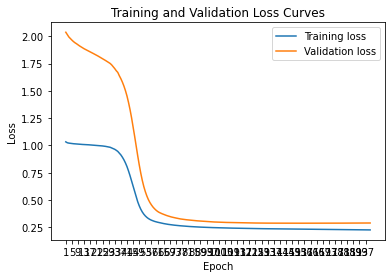

In [ ]:
# plot the training and validation loss curves
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses)+1, 4))
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Test 

In [ ]:
test_set

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Mean_Temperature_C,Mean_Maximum_Temperature_C,Mean_Minimum_Temperature_C,Mean_Mean_Wind_Speed_kmh,Mean_Max_Wind_Speed_kmh
Epic_week,,,,,,,,
2016_20,2.854213,0.118015,0.196785,1.400665,1.221196,1.719620,-0.269250,0.331696
2016_21,2.632892,0.267902,0.057841,2.125467,1.453681,1.746797,0.140829,1.115071
2016_22,1.942581,0.410219,-0.414869,0.920665,0.356983,1.340070,-0.644189,0.945016
2016_23,1.800304,0.149809,-0.095478,1.286607,0.662874,1.728434,-0.390481,0.421040
2016_24,1.547365,-0.063667,0.826997,0.405909,-0.461311,0.914980,-0.116392,0.340760
...,...,...,...,...,...,...,...,...
2018_48,2.806787,0.373883,0.214748,0.108537,-0.234156,-0.132611,-0.720772,0.505425
2018_49,1.109993,-0.337703,0.302265,-0.438129,0.229819,0.034089,-0.982807,-1.308654
2018_50,2.332528,0.401135,0.431917,-0.617818,-0.395955,0.007831,-0.701628,-0.502302


In [ ]:
# evaluate the model on the test set
criterion = nn.MSELoss()
model.load_state_dict(torch.load('lstm_model.pt'))
model.eval()
test_loss = 0.0
outputs_list = []
targets_list = []
with torch.no_grad():
    # a = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        test_loss += loss.item() * inputs.size(0)
        for i in range(len(outputs)):
            outputs_list.append(outputs[i].squeeze())
            targets_list.append(targets[i])
            loss = criterion(outputs[i].squeeze(), targets[i])
            # print('Output {}: Loss: {:.4f}'.format(a, loss))
            # a += 1
    test_loss /= len(test_loader.dataset)
outputs_arr = np.array(outputs_list)
outputs_arr = outputs_arr.reshape(-1,1)
targets_arr = np.array(targets_list)
targets_arr = targets_arr.reshape(-1,1)
print('Test Loss: {:.4f}'.format(test_loss)) 

Test Loss: 0.5112


In [ ]:
outputs_arr_copy = np.repeat(outputs_arr,8, axis=-1)
outputs_arr_copy.shape

(136, 8)

In [ ]:
pred = scaler.inverse_transform(np.reshape(outputs_arr_copy,(len(outputs_arr),8)))[:,0]
pred

array([1669.3677 , 1630.5653 , 1557.7014 , 1545.6305 , 1515.4792 ,
       1579.5045 , 1605.4122 , 1646.9556 , 1643.0082 , 1554.1487 ,
       1575.9465 , 1573.9965 , 1731.7424 , 1636.3848 , 1632.14   ,
       1707.7065 , 1645.856  , 1679.9075 , 1639.2313 , 1683.2351 ,
       1658.0358 , 1716.2759 , 1647.9122 , 1611.9886 , 1565.9915 ,
       1594.5355 , 1544.3988 , 1559.5105 , 1527.6277 , 1551.1171 ,
       1499.8306 , 1469.6825 , 1551.8784 , 1137.8899 , 1349.85   ,
       1389.697  , 1455.4475 , 1559.7836 , 1274.6802 , 1087.0032 ,
       1078.3546 , 1111.9001 ,  995.93097, 1038.1837 , 1024.3854 ,
       1047.8086 , 1097.9978 , 1064.5228 , 1068.8397 , 1127.0612 ,
       1122.4094 , 1225.4628 , 1133.5286 , 1157.2255 , 1096.9813 ,
       1097.531  , 1135.3444 ,  982.12225, 1136.1693 , 1082.7933 ,
       1234.97   , 1360.8912 , 1411.5701 , 1118.8026 , 1113.8544 ,
       1208.8123 , 1254.0209 , 1076.0193 , 1235.9354 , 1345.2941 ,
       1209.4769 , 1077.4408 , 1381.2736 , 1273.2809 , 1303.21

In [ ]:
targets_arr_copy = np.repeat(targets_arr,8, axis=-1)
test_labels = scaler.inverse_transform(np.reshape(targets_arr_copy,(len(targets_arr),8)))[:,0]
test_labels

array([1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700., 1606.,
       1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944., 1803.,
       1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548., 1573.,
       1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393., 1535.,
       1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044., 1039.,
       1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132., 1104.,
       1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474., 1148.,
       1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072., 1349.,
       1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244., 1295.,
       1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890., 1003.,
       1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283., 1237.,
       1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248., 1359.,
       1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549., 1373.,
       1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425., 1464.,
       1573., 1478.,

In [ ]:
def mape(actual, predicted):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100

mape_value = mape(test_labels, pred)
print("MAPE: {:.2f}%".format(mape_value))

MAPE: 7.74%


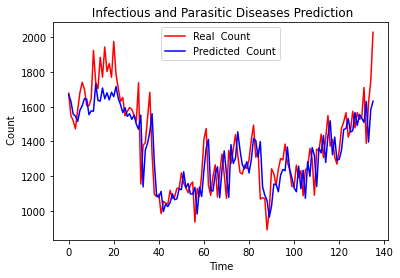

In [ ]:
plt.plot(test_labels, color = 'red', label = 'Real  Count')
plt.plot(pred, color = 'blue', label = 'Predicted  Count')
plt.title(' Infectious and Parasitic Diseases Prediction')
plt.xlabel('Time')
plt.ylabel(' Count')
plt.legend()
plt.show()

检验

In [ ]:
print(inputs)

tensor([[[ 1.5790, -0.6223,  0.0055, -0.4264, -0.1843,  0.2827, -0.9396,
          -0.3786]],

        [[ 2.0427, -0.2802,  0.6170, -0.0253,  0.4272,  0.0905, -0.8282,
          -1.0313]],

        [[ 1.8372, -0.2983,  1.0577, -0.3256, -0.2820, -0.8789, -1.1392,
           0.6631]],

        [[ 1.9004,  0.2952,  0.3716, -0.2939, -0.0877, -0.8094, -0.8710,
          -0.4296]],

        [[ 2.8068,  0.3739,  0.2147,  0.1085, -0.2342, -0.1326, -0.7208,
           0.5054]],

        [[ 1.1100, -0.3377,  0.3023, -0.4381,  0.2298,  0.0341, -0.9828,
          -1.3087]],

        [[ 2.3325,  0.4011,  0.4319, -0.6178, -0.3960,  0.0078, -0.7016,
          -0.5023]],

        [[ 3.0070,  0.5359, -0.4625,  0.3194,  0.9901,  0.5860, -0.2620,
          -0.2559]]])


In [ ]:
print(outputs)

tensor([[1.7233],
        [1.9381],
        [1.8748],
        [1.7642],
        [2.1957],
        [1.2950],
        [2.0406],
        [2.1975]])


In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# test_set

# Multiple Output Strategy (multi_step: 2; lag:6)
#### prediction(t+1), prediction(t+2) = model(obs(t-1), obs(t-2), ..., obs(t-n))

In [ ]:
# create the train, validation, and test datasets
train_tensor = torch.tensor(train_set.values, dtype=torch.float32)
val_tensor = torch.tensor(val_set.values, dtype=torch.float32)
test_tensor = torch.tensor(test_set.values, dtype=torch.float32)

# create new training, validation, and test datasets
train_data = []
for i in range(0, (len(train_tensor)-5)):
    train_data.append((train_tensor[i:i+4], train_tensor[i+4:i+6, 0]))
inputs, labels = zip(*train_data)
train_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels))

val_data = []
for i in range(0, (len(val_tensor)-5)):
    val_data.append((val_tensor[i:i+4], val_tensor[i+4:i+6, 0]))
inputs, labels = zip(*val_data)
val_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels))

test_data = []
for i in range(0, (len(test_tensor)-5)):
    test_data.append((test_tensor[i:i+4], test_tensor[i+4:i+6, 0]))
inputs, labels = zip(*test_data)
test_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels))

# create the train, validation, and test dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
# define the LSTM model
class LSTM_CNN_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_filters1, num_filters2):
        super(LSTM_CNN_Model, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.conv1 = nn.Conv1d(4, num_filters1, 3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(num_filters1, num_filters2, 2)
        self.fc1 = nn.Linear(192, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out, _ = self.lstm(x)  # Pass the input through the LSTM layer

        x = self.conv1(out)  # Pass the LSTM output through the first 1D convolutional layer
        x = self.relu(x)  # Apply the ReLU activation function
        x = self.pool(x)  # Apply max-pooling to reduce the spatial dimensions

        x = self.conv2(x)  # Pass the output through the second 1D convolutional layer
        x = self.relu(x)  
        x = self.pool(x)  
        
        x = x.flatten(1,-1)  # Flatten the tensor

        x = self.fc1(x)  # Pass the flattened tensor through the first fully connected layer
        x = self.relu(x)  
        out = self.fc2(x)  
        
        return out



In [ ]:
# initialize the model and define the loss and optimizer
input_size = train_tensor.shape[1]
hidden_size = 16
num_layers = 2
num_filters1 = 32
num_filters2 = 64
l2_regularization = 1e-3
model = LSTM_CNN_Model(input_size, hidden_size, num_layers, num_filters1, num_filters2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=l2_regularization) # weight_decay等价于正则化系数λ(L2正则化)：0-1

# train the model
num_epochs = 400
best_val_loss = float('inf')
best_epoch = 0
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # train the model
    train_loss = 0.0
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    
    # evaluate the model on the validation set
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)
        
    # append the training and validation loss for this epoch
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # print the training and validation loss for each epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))
    
    # save the model if the validation loss is the best so far
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), 'lstm_model.pt')

print('The epoch corresponding to the optimal validation loss is {}'.format(best_epoch))

Epoch [1/400], Train Loss: 1.0015, Val Loss: 1.7693
Epoch [2/400], Train Loss: 0.9987, Val Loss: 1.7665
Epoch [3/400], Train Loss: 0.9982, Val Loss: 1.7635
Epoch [4/400], Train Loss: 0.9979, Val Loss: 1.7607
Epoch [5/400], Train Loss: 0.9981, Val Loss: 1.7595
Epoch [6/400], Train Loss: 0.9976, Val Loss: 1.7568
Epoch [7/400], Train Loss: 0.9974, Val Loss: 1.7543
Epoch [8/400], Train Loss: 0.9972, Val Loss: 1.7521
Epoch [9/400], Train Loss: 0.9971, Val Loss: 1.7499
Epoch [10/400], Train Loss: 0.9969, Val Loss: 1.7480
Epoch [11/400], Train Loss: 0.9969, Val Loss: 1.7464
Epoch [12/400], Train Loss: 0.9967, Val Loss: 1.7446
Epoch [13/400], Train Loss: 0.9966, Val Loss: 1.7431
Epoch [14/400], Train Loss: 0.9964, Val Loss: 1.7414
Epoch [15/400], Train Loss: 0.9964, Val Loss: 1.7399
Epoch [16/400], Train Loss: 0.9962, Val Loss: 1.7384
Epoch [17/400], Train Loss: 0.9961, Val Loss: 1.7369
Epoch [18/400], Train Loss: 0.9960, Val Loss: 1.7354
Epoch [19/400], Train Loss: 0.9959, Val Loss: 1.7340
Ep

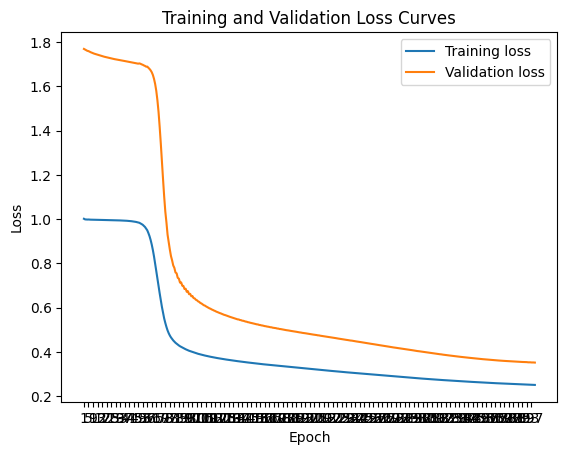

In [ ]:
# plot the training and validation loss curves
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses)+1, 4))
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Test

In [ ]:
# evaluate the model on the test set
model = LSTM_CNN_Model(input_size, hidden_size, num_layers, num_filters1, num_filters2)
model.load_state_dict(torch.load('lstm_model.pt'))
model.eval()
test_loss = 0.0
outputs_list = []
targets_list = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        test_loss += loss.item() * inputs.size(0)
        for i in range(len(outputs)):
            outputs_list.append(outputs[i][-1].squeeze())
            targets_list.append(targets[i][-1])
    test_loss /= len(test_loader.dataset)
outputs_arr = np.array(outputs_list)
outputs_arr = outputs_arr.reshape(-1,1)
targets_arr = np.array(targets_list)
targets_arr = targets_arr.reshape(-1,1)
print('Test Loss: {:.4f}'.format(test_loss)) 

Test Loss: 0.5340


In [ ]:
outputs_arr_copy = np.repeat(outputs_arr,8, axis=-1)
outputs_arr_copy.shape

(128, 8)

In [ ]:
pred = scaler.inverse_transform(np.reshape(outputs_arr_copy,(len(outputs_arr),8)))[:,0]
pred

array([1554.6116 , 1548.3995 , 1573.0125 , 1619.4745 , 1642.4637 ,
       1663.0599 , 1645.0953 , 1591.0092 , 1556.0142 , 1623.9275 ,
       1646.8268 , 1650.8849 , 1673.8301 , 1665.0688 , 1669.486  ,
       1650.7659 , 1637.4384 , 1645.8546 , 1666.965  , 1661.4792 ,
       1639.4885 , 1614.3757 , 1582.4507 , 1562.1827 , 1552.8345 ,
       1542.3098 , 1529.6699 , 1526.095  , 1532.6187 , 1587.9225 ,
       1348.0593 , 1317.8856 , 1393.2871 , 1497.603  , 1523.0782 ,
       1361.2559 , 1186.7194 , 1153.7598 , 1144.5333 , 1058.8231 ,
       1042.2155 , 1006.3608 , 1018.2468 , 1035.5447 , 1053.5903 ,
       1062.8745 , 1103.2854 , 1098.9132 , 1146.0154 , 1097.8534 ,
       1080.1167 , 1079.0198 , 1064.367  , 1064.0883 , 1001.61584,
       1031.2175 , 1038.6228 , 1155.459  , 1295.323  , 1386.3867 ,
       1230.0419 , 1156.7843 , 1191.8529 , 1211.584  , 1105.437  ,
       1131.8462 , 1235.4362 , 1207.6576 , 1106.7958 , 1238.7125 ,
       1282.137  , 1228.0306 , 1327.9227 , 1372.3076 , 1364.34

In [ ]:
targets_arr_copy = np.repeat(targets_arr,8, axis=-1)
test_labels = scaler.inverse_transform(np.reshape(targets_arr_copy,(len(targets_arr),8)))[:,0]
test_labels

array([1581., 1682., 1741., 1700., 1606., 1606., 1647., 1924., 1740.,
       1704., 1885., 1770., 1944., 1803., 1849., 1769., 1976., 1786.,
       1705., 1631., 1653., 1548., 1573., 1595., 1585., 1551., 1517.,
       1738., 1154., 1376., 1393., 1535., 1683., 1324., 1096., 1082.,
       1095.,  984., 1055., 1044., 1039., 1118., 1071., 1082., 1129.,
       1131., 1218., 1161., 1132., 1104., 1150., 1166.,  935., 1128.,
       1083., 1210., 1413., 1474., 1148., 1089., 1197., 1265., 1080.,
       1222., 1327., 1209., 1072., 1349., 1272., 1353., 1439., 1321.,
       1221., 1212., 1263., 1244., 1295., 1407., 1494., 1309., 1350.,
       1068., 1076., 1070.,  890., 1003., 1242., 1215., 1147., 1239.,
       1301., 1293., 1385., 1283., 1237., 1141., 1141., 1263., 1191.,
       1231., 1087., 1236., 1248., 1359., 1297., 1090., 1355., 1345.,
       1442., 1306., 1420., 1549., 1373., 1411., 1310., 1269., 1347.,
       1475., 1513., 1565., 1425., 1464., 1573., 1478., 1566., 1527.,
       1539., 1711.]

In [ ]:
def mape(actual, predicted):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100

mape_value = mape(test_labels, pred)
print("MAPE: {:.2f}%".format(mape_value))

MAPE: 9.04%


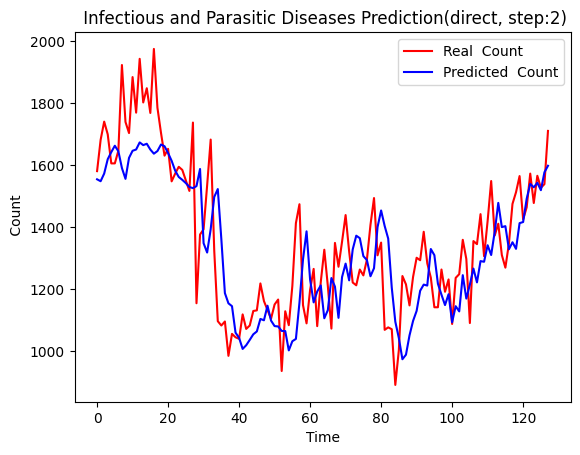

In [ ]:
plt.plot(test_labels, color = 'red', label = 'Real  Count')
plt.plot(pred, color = 'blue', label = 'Predicted  Count')
plt.title(' Infectious and Parasitic Diseases Prediction(direct, step:2)')
plt.xlabel('Time')
plt.ylabel(' Count')
plt.legend()
plt.show()

# Recursive Multi-step Forecast
#### prediction(t+1) = model(obs(t-1), obs(t-2), ..., obs(t-n))
#### prediction(t+2) = model(prediction(t+1), obs(t-1), ..., obs(t-n))

In [ ]:
# create the train, validation, and test datasets
train_tensor = torch.tensor(train_set.values, dtype=torch.float32)
val_tensor = torch.tensor(val_set.values, dtype=torch.float32)
test_tensor = torch.tensor(test_set.values, dtype=torch.float32)

# create new training, validation, and test datasets
train_data = []
for i in range(0, (len(train_tensor)-5)):
    train_data.append((train_tensor[i:i+4], train_tensor[i+4:i+6, 0], train_tensor[i+4:i+6, 1:]))
inputs, labels, remainings = zip(*train_data)
train_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels), torch.stack(remainings))

val_data = []
for i in range(0, (len(val_tensor)-5)):
    val_data.append((val_tensor[i:i+4], val_tensor[i+4:i+6, 0], val_tensor[i+4:i+6, 1:]))
inputs, labels, remainings = zip(*val_data)
val_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels), torch.stack(remainings))

test_data = []
for i in range(0, (len(test_tensor)-5)):
    test_data.append((test_tensor[i:i+4], test_tensor[i+4:i+6, 0], test_tensor[i+4:i+6, 1:]))
inputs, labels, remainings = zip(*test_data)
test_dataset = TensorDataset(torch.stack(inputs), torch.stack(labels), torch.stack(remainings))

# create the train, validation, and test dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
len(train_loader.dataset)

401

In [ ]:
# define the LSTM model for recursive multi-step forecasting
class RecursiveLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_filters1, num_filters2):
        super(RecursiveLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.conv1 = nn.Conv1d(4, num_filters1, 3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(num_filters1, num_filters2, 2)
        self.fc1 = nn.Linear(192, 32)
        self.fc2 = nn.Linear(32, 1)
        
    def forward(self, x, remainings):
        outputs = []
        for i in range(2):
            out, state = self.lstm(x)

            mid = self.conv1(out)  
            mid = self.relu(mid)  
            mid = self.pool(mid)  

            mid = self.conv2(mid)  
            mid = self.relu(mid)  
            mid = self.pool(mid)  
            
            mid = mid.flatten(1,-1)  

            mid = self.fc1(mid)  
            mid = self.relu(mid)  
            out = self.fc2(mid)  

            outputs.append(out)
            
            # Shift the input tensor one time step forward
            x = x[:, 1:, :]
            
            # Create a new time step with the same number of features as the original input
            new_time_step = x[:, -1:, :].clone()
            
            # Update the first feature (target variable) of the new time step with the predicted value
            new_time_step[:, :, 0] = out.squeeze().unsqueeze(1)
            
            # Update the remaining features of the new time step with the corresponding values from labels
            new_time_step[:, :, 1:] = remainings[:, i:i+1, :]
            
            # Concatenate the remaining time steps with the new time step
            x = torch.cat([x, new_time_step], dim=1)

        return torch.cat(outputs, dim=1)


# initialize the model and define the loss and optimizer for recursive multi-step forecasting
input_size = train_tensor.shape[1]
hidden_size = 16
num_layers = 2
num_filters1 = 32
num_filters2 = 64
model = RecursiveLSTMModel(input_size, hidden_size, num_layers, num_filters1, num_filters2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)

# train the model for recursive multi-step forecasting
num_epochs = 300
best_val_loss = float('inf')
best_epoch = 0
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    # train the model
    train_loss = 0.0
    model.train()
    for inputs, targets, remainings in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs, remainings)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)

    # evaluate the model on the validation set
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, targets, remainings in val_loader:
            outputs = model(inputs, remainings)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)

        
    # append the training and validation loss for this epoch
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # print the training and validation loss for each epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))
    
    
    # save
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), 'lstm_model.pt')

print('The epoch corresponding to the optimal validation loss is {}'.format(best_epoch))


Epoch [1/300], Train Loss: 1.0145, Val Loss: 1.8566
Epoch [2/300], Train Loss: 1.0043, Val Loss: 1.8408
Epoch [3/300], Train Loss: 1.0024, Val Loss: 1.8251
Epoch [4/300], Train Loss: 1.0010, Val Loss: 1.8110
Epoch [5/300], Train Loss: 0.9998, Val Loss: 1.7984
Epoch [6/300], Train Loss: 0.9988, Val Loss: 1.7871
Epoch [7/300], Train Loss: 0.9979, Val Loss: 1.7768
Epoch [8/300], Train Loss: 0.9971, Val Loss: 1.7681
Epoch [9/300], Train Loss: 0.9967, Val Loss: 1.7616
Epoch [10/300], Train Loss: 0.9956, Val Loss: 1.7538
Epoch [11/300], Train Loss: 0.9949, Val Loss: 1.7472
Epoch [12/300], Train Loss: 0.9944, Val Loss: 1.7426
Epoch [13/300], Train Loss: 0.9931, Val Loss: 1.7362
Epoch [14/300], Train Loss: 0.9923, Val Loss: 1.7311
Epoch [15/300], Train Loss: 0.9913, Val Loss: 1.7266
Epoch [16/300], Train Loss: 0.9899, Val Loss: 1.7217
Epoch [17/300], Train Loss: 0.9884, Val Loss: 1.7169
Epoch [18/300], Train Loss: 0.9867, Val Loss: 1.7123
Epoch [19/300], Train Loss: 0.9849, Val Loss: 1.7084
Ep

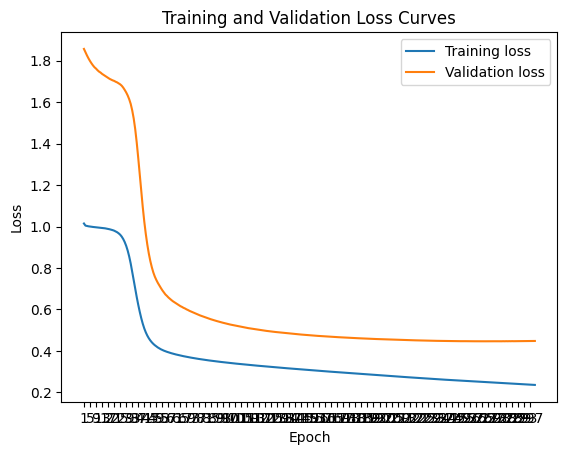

In [ ]:
# plot the training and validation loss curves
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_losses)+1, 4))
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test set
model = RecursiveLSTMModel(input_size, hidden_size, num_layers, num_filters1, num_filters2)
model.load_state_dict(torch.load('lstm_model.pt'))
model.eval()
test_loss = 0.0
outputs_list = []
targets_list = []
with torch.no_grad():
    for inputs, targets, remainings in test_loader:
        outputs = model(inputs, remainings)
        loss = criterion(outputs, targets)
        test_loss += loss.item() * inputs.size(0)
        for i in range(len(outputs)):
            outputs_list.append(outputs[i][-1].squeeze())
            targets_list.append(targets[i][-1])
    test_loss /= len(test_loader.dataset)
outputs_arr = np.array(outputs_list)
outputs_arr = outputs_arr.reshape(-1,1)
targets_arr = np.array(targets_list)
targets_arr = targets_arr.reshape(-1,1)
print('Test Loss: {:.4f}'.format(test_loss)) 

Test Loss: 0.6438


In [ ]:
outputs_arr_copy = np.repeat(outputs_arr,8, axis=-1)
outputs_arr_copy.shape

(128, 8)

In [ ]:
pred = scaler.inverse_transform(np.reshape(outputs_arr_copy,(len(outputs_arr),8)))[:,0]
pred

array([1497.4506 , 1480.1692 , 1514.4838 , 1559.4756 , 1623.1276 ,
       1605.2031 , 1532.6807 , 1492.8229 , 1499.9603 , 1592.595  ,
       1601.0126 , 1598.8    , 1603.9187 , 1599.9843 , 1598.4781 ,
       1557.638  , 1570.0894 , 1538.1143 , 1573.1118 , 1557.934  ,
       1540.9585 , 1529.9487 , 1531.0657 , 1512.7351 , 1500.013  ,
       1495.2839 , 1524.839  , 1528.1246 , 1503.43   , 1519.3306 ,
       1390.6975 , 1363.6843 , 1382.6906 , 1420.1495 , 1466.433  ,
       1391.6392 , 1285.0355 , 1188.8315 , 1137.4327 , 1054.4906 ,
       1013.3724 , 1006.67615, 1005.8283 , 1036.019  , 1048.1206 ,
       1053.0304 , 1070.6224 , 1067.4475 , 1071.6404 , 1056.7485 ,
       1056.1016 , 1037.7516 , 1032.1073 , 1042.7266 , 1006.81903,
       1021.6383 , 1067.9822 , 1141.6212 , 1222.6647 , 1297.5486 ,
       1244.8224 , 1153.0532 , 1130.3037 , 1165.1278 , 1098.5046 ,
       1110.6699 , 1199.2762 , 1223.8746 , 1158.1161 , 1241.246  ,
       1201.8867 , 1185.2938 , 1284.7018 , 1372.1393 , 1367.76

In [ ]:
targets_arr_copy = np.repeat(targets_arr,8, axis=-1)
test_labels = scaler.inverse_transform(np.reshape(targets_arr_copy,(len(targets_arr),8)))[:,0]
test_labels

array([1581., 1682., 1741., 1700., 1606., 1606., 1647., 1924., 1740.,
       1704., 1885., 1770., 1944., 1803., 1849., 1769., 1976., 1786.,
       1705., 1631., 1653., 1548., 1573., 1595., 1585., 1551., 1517.,
       1738., 1154., 1376., 1393., 1535., 1683., 1324., 1096., 1082.,
       1095.,  984., 1055., 1044., 1039., 1118., 1071., 1082., 1129.,
       1131., 1218., 1161., 1132., 1104., 1150., 1166.,  935., 1128.,
       1083., 1210., 1413., 1474., 1148., 1089., 1197., 1265., 1080.,
       1222., 1327., 1209., 1072., 1349., 1272., 1353., 1439., 1321.,
       1221., 1212., 1263., 1244., 1295., 1407., 1494., 1309., 1350.,
       1068., 1076., 1070.,  890., 1003., 1242., 1215., 1147., 1239.,
       1301., 1293., 1385., 1283., 1237., 1141., 1141., 1263., 1191.,
       1231., 1087., 1236., 1248., 1359., 1297., 1090., 1355., 1345.,
       1442., 1306., 1420., 1549., 1373., 1411., 1310., 1269., 1347.,
       1475., 1513., 1565., 1425., 1464., 1573., 1478., 1566., 1527.,
       1539., 1711.]

MAPE: 9.90%


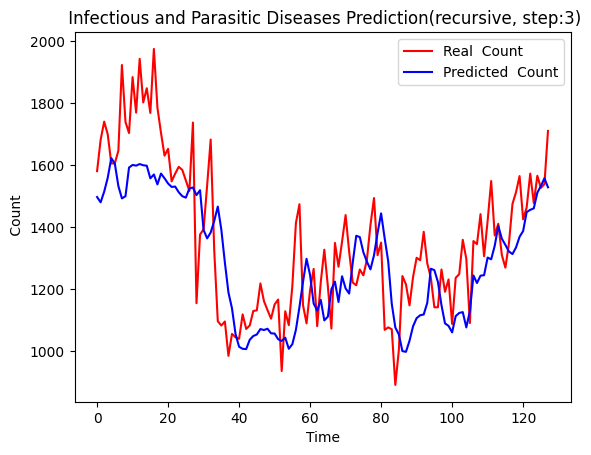

In [ ]:
def mape(actual, predicted):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100

mape_value = mape(test_labels, pred)
print("MAPE: {:.2f}%".format(mape_value))

plt.plot(test_labels, color = 'red', label = 'Real  Count')
plt.plot(pred, color = 'blue', label = 'Predicted  Count')
plt.title(' Infectious and Parasitic Diseases Prediction(recursive, step:3)')
plt.xlabel('Time')
plt.ylabel(' Count')
plt.legend()
plt.show()

In [ ]:
print(inputs)

tensor([[[ 0.6041, -0.4513, -0.5508,  1.1475,  1.5350,  1.1146,  0.9419,
           0.4926],
         [ 1.0889, -0.3044, -0.2561, -0.6934, -0.3209, -0.3990, -0.2901,
           0.6849],
         [ 0.5514, -0.6148,  0.0401,  0.8761,  1.4884,  1.0737,  0.4828,
          -0.2486],
         [ 0.3090, -0.7450, -0.6370,  1.5423,  1.4496,  1.9694,  0.7748,
           0.3892]],

        [[ 0.3090, -0.7450, -0.6370,  1.5423,  1.4496,  1.9694,  0.7748,
           0.3892],
         [-0.1969, -1.1144,  0.6251,  0.0161,  0.7242,  0.4670, -0.3642,
           0.1669],
         [-0.1969, -0.9463,  0.1074,  0.7957,  1.1384,  0.6507, -0.5718,
          -0.2947],
         [ 0.4460, -0.6072,  0.0698,  1.1299,  1.0549,  1.1663, -0.4942,
           0.2000]],

        [[ 0.4460, -0.6072,  0.0698,  1.1299,  1.0549,  1.1663, -0.4942,
           0.2000],
         [ 0.0666, -0.7843, -1.0001,  2.6422,  1.9830,  3.1825,  0.3786,
          -0.1389],
         [ 0.2774, -0.6996,  0.6433,  0.7812,  0.8732,  0.9480, -0

In [ ]:
print(targets)

tensor([[-0.1969, -0.1969,  0.4460],
        [ 0.0666,  0.2774, -0.4814],
        [ 0.3038,  0.3670,  0.9519],
        [ 0.6252, -0.4656,  0.9308],
        [ 0.8781,  1.3893,  0.6726],
        [ 1.2733,  1.9531,  1.0257],
        [ 1.2259,  0.6937,  0.4776],
        [ 0.8887,  1.5632,  1.7634],
        [ 2.0374,  1.2997,  1.5052],
        [ 2.0796,  1.5790,  2.0427],
        [ 1.8372,  1.9004,  2.8068],
        [ 1.1100,  2.3325,  3.0070]])


In [ ]:
print(remainings)

tensor([[[-1.1144,  0.6251,  0.0161,  0.7242,  0.4670, -0.3642,  0.1669],
         [-0.9463,  0.1074,  0.7957,  1.1384,  0.6507, -0.5718, -0.2947],
         [-0.6072,  0.0698,  1.1299,  1.0549,  1.1663, -0.4942,  0.2000]],

        [[-0.7843, -1.0001,  2.6422,  1.9830,  3.1825,  0.3786, -0.1389],
         [-0.6996,  0.6433,  0.7812,  0.8732,  0.9480, -0.6959, -0.3339],
         [-0.9463,  0.2360,  0.6606,  0.4868,  0.7321, -0.4601, -1.1665]],

        [[-0.5618,  1.0581,  0.2154, -0.3380, -0.0039, -0.8356,  0.3114],
         [-0.6011, -0.9248,  2.4881,  1.4348,  2.3083, -0.0859, -0.4379],
         [-0.6360, -0.5915,  1.7493,  0.2802,  2.4392,  0.1403,  0.4148]],

        [[-0.5209,  0.0370,  0.5143, -0.4948,  0.5080, -0.2018,  0.7933],
         [-1.2431,  0.9787, -0.9084, -2.4673, -0.8996, -0.1101, -0.0349],
         [-0.5148, -0.5069,  0.5585, -0.4591,  0.9425,  0.1122,  0.0655]],

        [[-0.2817, -0.8801,  1.0713, -0.3067,  1.5676,  0.5900,  0.1618],
         [-0.3226, -0.2801,  1

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
test_set

,Infectious and Parasitic Diseases,Respiratory Infection,Daily_Rainfall_Total_mm,Mean_Temperature_C,Mean_Wind_Speed_kmh
Epic_week,,,,,
2016_20,2.854213,0.118015,0.196785,1.400665,-0.269250
2016_21,2.632892,0.267902,0.057841,2.125467,0.140829
2016_22,1.942581,0.410219,-0.414869,0.920665,-0.644189
2016_23,1.800304,0.149809,-0.095478,1.286607,-0.390481
2016_24,1.547365,-0.063667,0.826997,0.405909,-0.116392
2016_25,2.121746,0.301210,-0.126753,0.756813,-0.356045
2016_26,2.653971,0.546480,-1.196392,2.689390,0.160507
2016_27,2.964874,0.756928,-0.545585,2.512924,0.503470
2016_28,2.748822,0.445042,0.088068,0.829904,-0.258708
